In [1]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.optim import SGD as torch_SGD
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
device =  'cuda' if torch.cuda.is_available() else 'cpu'
print(device)



cuda


In [6]:
from final_model import Model
from torch import load

model = Model(device = 'cuda')
path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'
noisy_imgs_1, noisy_imgs_2 = load(path_train)
noisy_imgs_1 = noisy_imgs_1[0:1000]
noisy_imgs_2 = noisy_imgs_2[0:1000]
noisy_imgs , clean_imgs = load(path_val)

model.optimizer.lr = 1e-2
model.train(noisy_imgs_1, noisy_imgs_2, 20)

out = model.predict(noisy_imgs)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.23it/s]


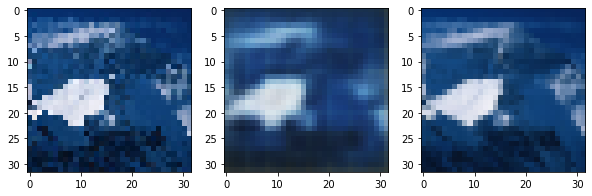

In [7]:
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
transform = T.ToPILImage()
k = 7
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(1, 3,2)
plt.imshow(transform(out[k]));
plt.subplot(1, 3,3)
# plt.imshow(transform(out[k]));
# plt.subplot(1, 4,4)
plt.imshow(transform(clean_imgs[k]));